In [21]:

import json
import numpy as np


import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

pd.set_option('display.max_columns',500)
pd.set_option('max_colwidth',500)


In [22]:
df_archive= pd.read_csv('netflix_titles.csv')

DATA ASSESSMENT

In [23]:
df_archive.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life."


In [24]:
df_archive.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1608,s1609,Movie,3 Days to Kill,McG,"Kevin Costner, Amber Heard, Hailee Steinfeld, Connie Nielsen, Tómas Lemarquis, Richard Sammel, Marc Andréoni, Bruno Ricci, Jonas Bloquet, Eriq Ebouaney","United States, France, Serbia","December 1, 2020",2014,PG-13,117 min,Action & Adventure,A terminally ill secret agent accepts a risky mission in exchange for an experimental drug that might save him – if he can survive its side effects.
631,s632,TV Show,The Seven Deadly Sins,NaN,"Yuki Kaji, Sora Amamiya, Misaki Kuno, Aoi Yuki, Tatsuhisa Suzuki, Jun Fukuyama, Mamoru Miyano, Maaya Sakamoto",Japan,"June 28, 2021",2021,TV-14,5 Seasons,"Anime Series, International TV Shows","When a kingdom is taken over by tyrants, the deposed princess begins a quest to find a disbanded group of evil knights to help take back her realm."
7649,s7650,TV Show,Ollie & Moon,NaN,"Mattea Conforti, Kobi Frumer",France,"March 28, 2018",2018,TV-Y,1 Season,Kids' TV,"Two quirky cats, Ollie and Moon, and their friend Stanley the snail travel the world, solving everyday problems and learning about different cultures."
169,s170,Movie,Poseidon,Wolfgang Petersen,"Josh Lucas, Kurt Russell, Jacinda Barrett, Richard Dreyfuss, Emmy Rossum, Mía Maestro, Mike Vogel, Kevin Dillon, Freddy Rodríguez",United States,"September 1, 2021",2006,PG-13,98 min,"Action & Adventure, Dramas","A tidal wave spells disaster for a ship of New Year's Eve revelers when it capsizes the mammoth vessel, sending passengers into a battle for survival."
6652,s6653,TV Show,Dueños del paraíso,NaN,"Kate del Castillo, Jorge Zabaleta, José María Torre, Tony Dalton, Géraldine Bazán, Ximena Duque, Adriana Barraza, Juan Pablo Llano, Daniela Wong, Tiago Correa, Margarita Muñoz, Miguel Varoni, Ariel Texido, María Luisa Flores, Alberto Jiménez, Andrea López, Maxi Iglesias, Jorge Hernández, Alberto Mateo, Sofía Lama","United States, Chile","February 25, 2017",2015,TV-14,1 Season,"Crime TV Shows, International TV Shows, Spanish-Language TV Shows","When Anastasia Cardona's drug lord husband is murdered, she inherits his cocaine empire, leading to a life of wealth, power, violence and betrayal."


In [25]:
#information of df_archive
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


DATA CLEANING

In [26]:
#making copies of the files before cleaning
df_archive_clean = df_archive.copy()

In [27]:
#converting date_added to datetime type,extracting date-added and added_year
df_archive_clean['date_added'] = pd.to_datetime(df_archive_clean['date_added'])
df_archive_clean['added_month'] = df_archive_clean['date_added'].dt.month
df_archive_clean['added_year'] = df_archive_clean['date_added'].dt.year

In [28]:
#converting release_year to int type and dropping nan values in release year column
df_archive_clean['release_year'] = pd.to_numeric(df_archive_clean['release_year'], errors='coerce')

In [29]:
df_archive_clean = df_archive_clean.dropna(subset=['release_year'])

In [30]:
df_archive_clean['release_year'] = df_archive_clean['release_year'].astype(int)

In [31]:
df_archive_clean['added_year'] = df_archive_clean['added_year'].astype(str)

In [32]:
df_archive_clean

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_month,added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.",9.0,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.",9.0,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.",9.0,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series.",9.0,2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life.",9.0,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey Jr., Anthony Edwards, Brian Cox, Elias Koteas, Donal Logue, John Carroll Lynch, Dermot Mulroney, Chloë Sevigny",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a pair of cops investigate San Francisco's infamous Zodiac Killer in this thriller based on a true story.",11.0,2019.0
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young girl befriends a motley crew of zombie children with diverse personalities.",7.0,2019.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies","Looking to survive in a world taken over by zombies, a dorky college student teams with an urban roughneck and a pair of grifter sisters.",11.0,2019.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero must train a new crop of youthful saviors when the military preps for an attack by a familiar villain.",1.0,2020.0


In [33]:
#filling missing values with the mean
numeric_columns = df_archive_clean.select_dtypes(include=['float64', 'int64']).columns
df_archive_clean[numeric_columns] = df_archive_clean[numeric_columns].fillna(df_archive_clean[numeric_columns].mean())

In [34]:
#filling missing values in the categoriocal columns with unknown
categorical_columns = ['rating', 'duration', 'country']

for column in categorical_columns:
    df_archive_clean[column] = df_archive_clean[column].fillna("Unknown")

In [35]:
#Standardize capitalization in 'type' column
df_archive_clean['type'] = df_archive_clean['type'].str.capitalize()

In [36]:
#Standardize capitalization in 'rating' column
df_archive_clean['rating'] = df_archive_clean['rating'].str.upper()

#Check for duplicate entries
duplicate_rows = df_archive_clean[df_archive_clean.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

In [37]:
#Removing duplicate entries and keeping the first occurrence
df_archive_clean = df_archive_clean.drop_duplicates()

In [38]:
df_archive_clean

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_month,added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.",9.0,2021.0
1,s2,Tv show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.",9.0,2021.0
2,s3,Tv show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.",9.0,2021.0
3,s4,Tv show,Jailbirds New Orleans,NaN,NaN,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series.",9.0,2021.0
4,s5,Tv show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life.",9.0,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey Jr., Anthony Edwards, Brian Cox, Elias Koteas, Donal Logue, John Carroll Lynch, Dermot Mulroney, Chloë Sevigny",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a pair of cops investigate San Francisco's infamous Zodiac Killer in this thriller based on a true story.",11.0,2019.0
8803,s8804,Tv show,Zombie Dumb,NaN,NaN,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young girl befriends a motley crew of zombie children with diverse personalities.",7.0,2019.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies","Looking to survive in a world taken over by zombies, a dorky college student teams with an urban roughneck and a pair of grifter sisters.",11.0,2019.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero must train a new crop of youthful saviors when the military preps for an attack by a familiar villain.",1.0,2020.0


In [40]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int32         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  added_month   8807 non-null   float64       
 13  added_year    8807 non-null   object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(11)
memory usage: 997.7+ KB


DATA EXPLOARTION

In [41]:
#year with highest released movies
year_count = df_archive_clean[df_archive_clean['type'] == 'Movie'].groupby('release_year').size()
most_movies_year = year_count.idxmax()
print(f"Year with the most released movies: {most_movies_year}")
print(f"Number of released movies in {most_movies_year}: {year_count.max()}")

Year with the most released movies: 2017
Number of released movies in 2017: 767


In [42]:
#year with highest released movies
year_count = df_archive_clean[df_archive_clean['type'] == 'Tv show'].groupby('release_year').size()
most_tvshows_year = year_count.idxmax()
print(f"Year with the most released Tv shows: {most_tvshows_year}")
print(f"Number of released TV shows in {most_tvshows_year}: {year_count.max()}")

Year with the most released Tv shows: 2020
Number of released TV shows in 2020: 436


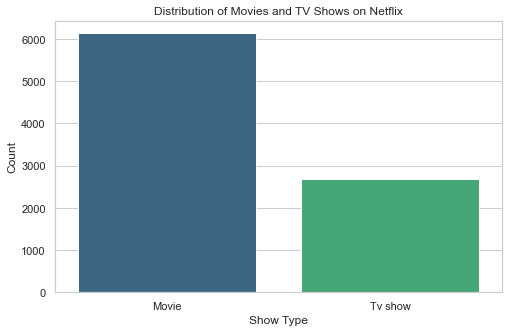

In [43]:
#Distribution of  Movies and TV shows on Netflix
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(x='type', data=df_archive_clean, palette="viridis")

# Adding labels and title
plt.xlabel('Show Type')
plt.ylabel('Count')
plt.title('Distribution of Movies and TV Shows on Netflix')

# Show the plot
plt.show()

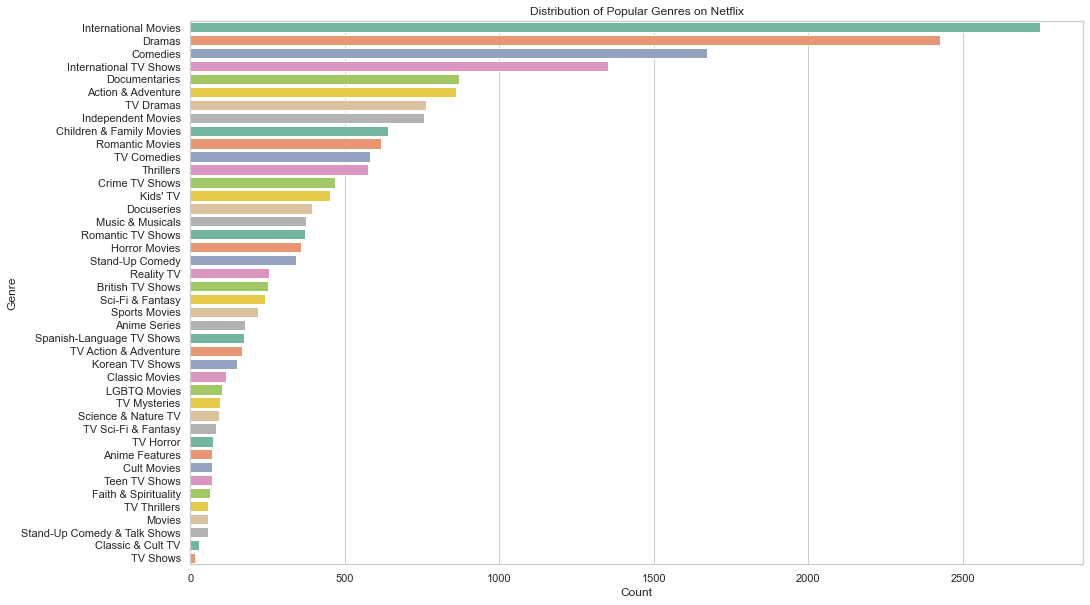

In [44]:
#Determining the popular genre in Netflix Distribution
genres = df_archive_clean['listed_in'].str.split(', ', expand=True).stack()

# Create a bar plot for popular genres
plt.figure(figsize=(16, 10))
sns.countplot(y=genres, order=genres.value_counts().index, palette="Set2")

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Distribution of Popular Genres on Netflix')

# Show the plot
plt.show()

In [45]:
#frequency analysis between the type and rating column
type_counts = df_archive_clean['type'].value_counts()

# Categorical analysis for 'rating'
rating_counts = df_archive_clean['rating'].value_counts()

# Print the results
print("Frequency Analysis for 'type' column:")
print(type_counts)

print("\nFrequency Analysis for 'rating' column:")
print(rating_counts)

Frequency Analysis for 'type' column:
Movie      6131
Tv show    2676
Name: type, dtype: int64

Frequency Analysis for 'rating' column:
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
UNKNOWN        4
NC-17          3
UR             3
74 MIN         1
84 MIN         1
66 MIN         1
Name: rating, dtype: int64


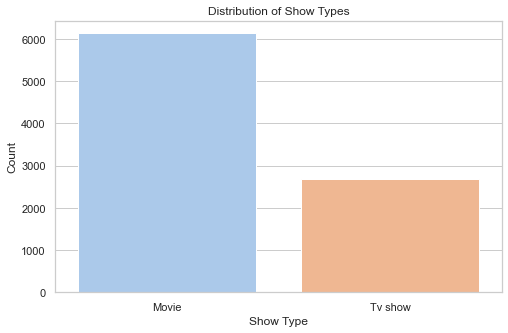

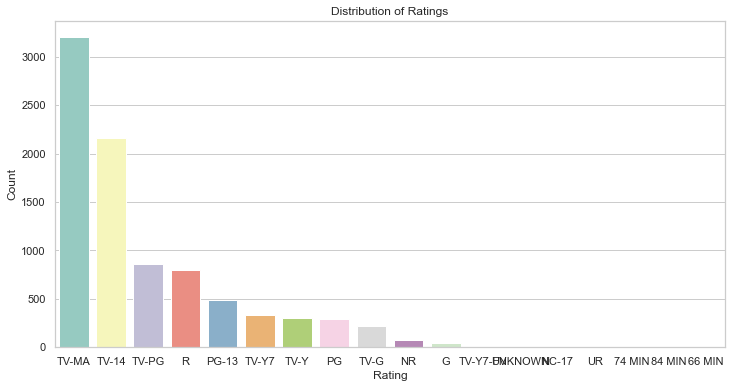

In [46]:
# Plot bar chart for 'type'
plt.figure(figsize=(8, 5))
sns.countplot(x='type', data=df_archive_clean, palette="pastel")
plt.title('Distribution of Show Types')
plt.xlabel('Show Type')
plt.ylabel('Count')
plt.show()

# Plot bar chart for 'rating'
plt.figure(figsize=(12, 6))
sns.countplot(x='rating', data=df_archive_clean, order=df_archive_clean['rating'].value_counts().index, palette="Set3")
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

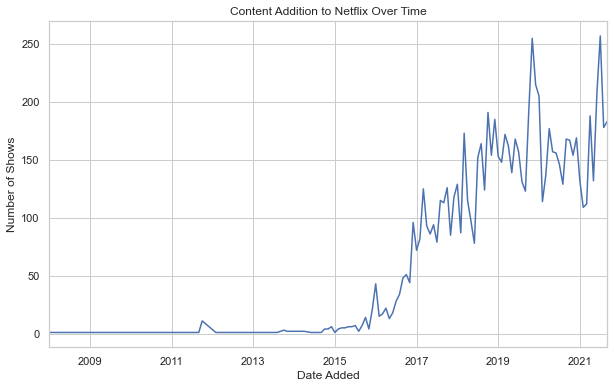

In [47]:
#  Analyzing content addition over time
content_addition_over_time = df_archive_clean.groupby(df_archive_clean['date_added'].dt.to_period('M')).size()
content_addition_over_time.plot(kind='line', figsize=(10, 6))
plt.title('Content Addition to Netflix Over Time')
plt.xlabel('Date Added')
plt.ylabel('Number of Shows')
plt.show()

In [48]:
content_addition_by_year = df_archive_clean.groupby('release_year').size()
X = sm.add_constant(content_addition_by_year.index)  # Adding a constant term for the intercept
y = content_addition_by_year.values
model = sm.OLS(y, X)
results = model.fit()
p_value = results.pvalues[1]  # p-value for the coefficient of the year variable

# Print the results
print(f"P-value for the coefficient of the year variable: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis. There is evidence of an increase in content addition over the years.")
else:
    print("Fail to reject the null hypothesis. There is no evidence of an increase in content addition over the years.")

P-value for the coefficient of the year variable: 1.96379660875856e-08
Reject the null hypothesis. There is evidence of an increase in content addition over the years.
